In [ ]:


import pandas as pd

file_path = '/content/drive/MyDrive/Sentiment-Analysis-Product-Reviews/data/Reviews.csv'

# Load the CSV while skipping bad lines
df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8')

# Preview the data
df = df[['Text', 'Score']].dropna()
df.head()



,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [ ]:

# Keep only necessary columns
df = df[['Text', 'Score']].dropna()

# Define sentiment labeling function
def get_sentiment(score):
    if score > 3:
        return 'positive'
    elif score < 3:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling
df['Sentiment'] = df['Score'].apply(get_sentiment)

# Display sentiment distribution
df['Sentiment'].value_counts()


,count
Sentiment,
positive,60579
negative,11742
neutral,6398


**Text Processing and Model Training**

In [ ]:

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Prepare stopwords and vectorizer
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)

# Vectorize the text
X = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Text vectorized and data split into training and testing sets.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Text vectorized and data split into training and testing sets.


**Train and Evaluate the Model**

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.26      0.40      2433
     neutral       0.42      0.02      0.03      1304
    positive       0.80      0.99      0.89     12007

    accuracy                           0.80     15744
   macro avg       0.69      0.42      0.44     15744
weighted avg       0.77      0.80      0.74     15744

Confusion Matrix:

[[  632    11  1790]
 [   55    22  1227]
 [   60    20 11927]]


**Save the Model and Vectorizer**

In [ ]:

import joblib

# Save model and vectorizer to your Google Drive
joblib.dump(model, '/content/drive/MyDrive/Sentiment-Analysis-Product-Reviews/models/sentiment_model.pkl')
joblib.dump(vectorizer, '/content/drive/MyDrive/Sentiment-Analysis-Product-Reviews/models/vectorizer.pkl')

print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.


**Creating Prediction Function**

In [ ]:

import joblib

# Load model and vectorizer
model = joblib.load('/content/drive/MyDrive/Sentiment-Analysis-Product-Reviews/models/sentiment_model.pkl')
vectorizer = joblib.load('/content/drive/MyDrive/Sentiment-Analysis-Product-Reviews/models/vectorizer.pkl')

# Define prediction function
def predict_sentiment(text):
    X = vectorizer.transform([text])
    prediction = model.predict(X)[0]
    return prediction

# Test the function
sample_review = "This product is absolutely fantastic! Highly recommend."
print("Predicted Sentiment:", predict_sentiment(sample_review))


Predicted Sentiment: positive


This will:

Load your saved model and vectorizer

Predict sentiment for any new review text

**Generate a word cloud in colab**

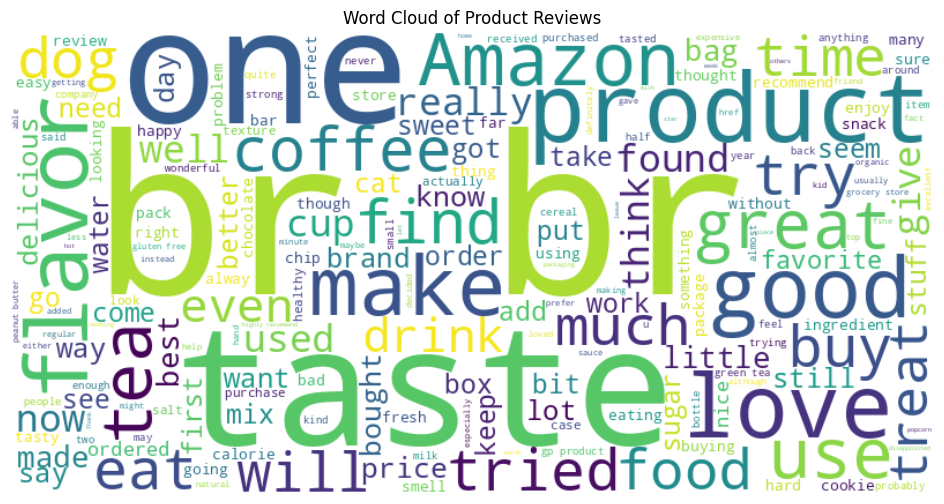

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all review text into one string
text = " ".join(df['Text'].astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Product Reviews")
plt.show()
